In [6]:
import numpy as np
import pandas as pd
data1=pd.read_csv('C:/Users/Krishna/Desktop/Autism-Adult-Data Plus Description File/Autism-Adult-Data.csv')
d1=pd.DataFrame(data1)
data2=pd.read_csv('D:/A/ANN/project/Autism-Screening-Child-Data Plus Description/Autism-Child-Data.csv')
d2=pd.DataFrame(data2)
data=[d1, d2]
data=pd.concat(data)
data.head()



,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,...,f,White-European,no,no,'United States',no,6,'18 and more',Self,YES
1,1,1,0,1,0,0,0,1,0,1,...,m,Latino,no,yes,Brazil,no,5,'18 and more',Self,YES
2,1,1,0,1,1,0,1,1,1,1,...,m,Latino,yes,yes,Spain,no,8,'18 and more',Parent,YES
3,1,1,0,1,0,0,1,1,0,1,...,f,White-European,no,yes,'United States',no,6,'18 and more',Self,NO
4,1,0,0,0,0,0,0,1,0,0,...,f,?,no,no,Egypt,no,2,'18 and more',?,YES


In [7]:
data=data.replace('?',np.nan)#replacing ? with Nan
data=data.fillna(method='ffill')#forward-fill to propagate the previous value forward
data.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,...,f,White-European,no,no,'United States',no,6,'18 and more',Self,YES
1,1,1,0,1,0,0,0,1,0,1,...,m,Latino,no,yes,Brazil,no,5,'18 and more',Self,YES
2,1,1,0,1,1,0,1,1,1,1,...,m,Latino,yes,yes,Spain,no,8,'18 and more',Parent,YES
3,1,1,0,1,0,0,1,1,0,1,...,f,White-European,no,yes,'United States',no,6,'18 and more',Self,NO
4,1,0,0,0,0,0,0,1,0,0,...,f,White-European,no,no,Egypt,no,2,'18 and more',Self,YES


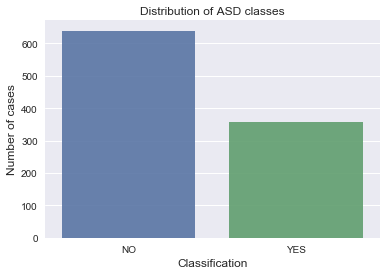

NO     639
YES    357
Name: Class/ASD, dtype: int64

In [8]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
class_count = data['Class/ASD'].value_counts()
sns.set(style="darkgrid")
sns.barplot(class_count.index, class_count.values, alpha=0.9)
plt.title('Distribution of ASD classes')
plt.ylabel('Number of cases', fontsize=12)
plt.xlabel('Classification', fontsize=12)
plt.show()
class_count

In [9]:
data=data.rename(columns={'jundice':'jaundice','austim':'autism','contry_of_res':'country_of_res'})
#data.drop(columns=['age_desc','contry_of_res','used_app_before','relation','ethnicity','age'],inplace=True)
data.drop(columns=['result'],inplace=True)
#converting into categorical values
data['gender']=data['gender'].astype('category')
data['gender']=data['gender'].cat.codes

data['Class/ASD']=data['Class/ASD'].astype('category')
data['Class/ASD']=data['Class/ASD'].cat.codes

data['jaundice']=data['jaundice'].astype('category')
data['jaundice']=data['jaundice'].cat.codes

data['autism']=data['autism'].astype('category')
data['autism']=data['autism'].cat.codes

data['ethnicity']=data['ethnicity'].astype('category')
data['ethnicity']=data['ethnicity'].cat.codes

data['country_of_res']=data['country_of_res'].astype('category')
data['country_of_res']=data['country_of_res'].cat.codes

data['used_app_before']=data['used_app_before'].astype('category')
data['used_app_before']=data['used_app_before'].cat.codes

data['age_desc']=data['age_desc'].astype('category')
data['age_desc']=data['age_desc'].cat.codes

data['relation']=data['relation'].astype('category')
data['relation']=data['relation'].cat.codes

data.head(10)

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,autism,country_of_res,used_app_before,age_desc,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,26,0,9,0,0,13,0,0,4,1
1,1,1,0,1,0,0,0,1,0,1,24,1,5,0,1,30,0,0,4,1
2,1,1,0,1,1,0,1,1,1,1,27,1,5,1,1,76,0,0,2,1
3,1,1,0,1,0,0,1,1,0,1,35,0,9,0,1,13,0,0,4,0
4,1,0,0,0,0,0,0,1,0,0,40,0,9,0,0,38,0,0,4,1
5,1,1,1,1,1,0,1,1,1,1,36,1,6,1,0,13,0,0,4,0
6,0,1,0,0,0,0,0,1,0,0,17,0,3,0,0,13,0,0,4,1
7,1,1,1,1,0,0,0,0,1,0,64,1,9,0,0,4,0,0,2,0
8,1,1,0,0,1,0,0,1,1,1,29,1,9,0,0,13,0,0,4,1
9,1,1,1,1,0,1,1,1,1,0,17,1,2,1,1,24,0,0,0,1


In [10]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
import numpy as np

D:\Anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [11]:
#The simplest model is defined in the Sequential class which is a linear stack of Layers.
X=data.iloc[:,0:18]
y=data.iloc[:,19]
seed=2
np.random.seed(seed)
(X_train,X_test,y_train,y_test)=train_test_split(X,y,test_size=0.09,random_state=seed)
#Creating a model sequentially
model=Sequential() 
model.add(Dense(32,init='uniform',input_dim=18,activation='relu'))#every neuron is densely connected to the neuron of next layer
model.add(Dense(64,init='uniform',activation='relu')) #init: uniform normal distribution of weights()
model.add(Dense(1,init='uniform',activation='sigmoid'))#output layer

#Weights are initialized to small uniformly random values between 0 and 0.05 using init

model.compile(loss='mean_squared_error',optimizer='rmsprop',metrics=['accuracy'])
# loss:used to evaluate a set of weights. It is needed to reduce the error between actual output and expected output
# optimizer: gradient descent to optimize weights

a=model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=300,batch_size=100)
#epochs: no. of training cycles




D:\Anaconda\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(32, input_dim=18, activation="relu", kernel_initializer="uniform")`
  if __name__ == '__main__':
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(64, activation="relu", kernel_initializer="uniform")`
  # Remove the CWD from sys.path while we load stuff.
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="sigmoid", kernel_initializer="uniform")`
  # This is added back by InteractiveShellApp.init_path()


Train on 906 samples, validate on 90 samples
Epoch 1/300
906/906 [==============================] - 1s 1ms/step - loss: 0.2368 - acc: 0.6369 - val_loss: 0.2090 - val_acc: 0.6889
Epoch 2/300
906/906 [==============================] - 0s 44us/step - loss: 0.2261 - acc: 0.6369 - val_loss: 0.2072 - val_acc: 0.6889
Epoch 3/300
906/906 [==============================] - 0s 57us/step - loss: 0.2231 - acc: 0.6369 - val_loss: 0.2041 - val_acc: 0.6889
Epoch 4/300
906/906 [==============================] - 0s 55us/step - loss: 0.2198 - acc: 0.6369 - val_loss: 0.1985 - val_acc: 0.6889
Epoch 5/300
906/906 [==============================] - 0s 56us/step - loss: 0.2168 - acc: 0.6369 - val_loss: 0.1992 - val_acc: 0.7111
Epoch 6/300
906/906 [==============================] - 0s 56us/step - loss: 0.2113 - acc: 0.6832 - val_loss: 0.1899 - val_acc: 0.7556
Epoch 7/300
906/906 [==============================] - 0s 54us/step - loss: 0.2049 - acc: 0.6821 - val_loss: 0.1844 - val_acc: 0.7333
Epoch 8/300
906/90

906/906 [==============================] - 0s 48us/step - loss: 0.0685 - acc: 0.9227 - val_loss: 0.1360 - val_acc: 0.8111
Epoch 62/300
906/906 [==============================] - 0s 47us/step - loss: 0.0740 - acc: 0.9117 - val_loss: 0.0790 - val_acc: 0.8889
Epoch 63/300
906/906 [==============================] - 0s 47us/step - loss: 0.0657 - acc: 0.9260 - val_loss: 0.0898 - val_acc: 0.8778
Epoch 64/300
906/906 [==============================] - 0s 52us/step - loss: 0.0673 - acc: 0.9216 - val_loss: 0.0783 - val_acc: 0.8778
Epoch 65/300
906/906 [==============================] - 0s 46us/step - loss: 0.0674 - acc: 0.9150 - val_loss: 0.0819 - val_acc: 0.8889
Epoch 66/300
906/906 [==============================] - 0s 50us/step - loss: 0.0673 - acc: 0.9205 - val_loss: 0.1311 - val_acc: 0.8222
Epoch 67/300
906/906 [==============================] - 0s 56us/step - loss: 0.0688 - acc: 0.9150 - val_loss: 0.1131 - val_acc: 0.8444
Epoch 68/300
906/906 [==============================] - 0s 58us/step

906/906 [==============================] - 0s 45us/step - loss: 0.0514 - acc: 0.9415 - val_loss: 0.1009 - val_acc: 0.8444
Epoch 122/300
906/906 [==============================] - 0s 44us/step - loss: 0.0554 - acc: 0.9382 - val_loss: 0.0655 - val_acc: 0.9000
Epoch 123/300
906/906 [==============================] - 0s 43us/step - loss: 0.0511 - acc: 0.9426 - val_loss: 0.0647 - val_acc: 0.9222
Epoch 124/300
906/906 [==============================] - 0s 47us/step - loss: 0.0540 - acc: 0.9349 - val_loss: 0.1080 - val_acc: 0.8556
Epoch 125/300
906/906 [==============================] - 0s 44us/step - loss: 0.0547 - acc: 0.9404 - val_loss: 0.0692 - val_acc: 0.9111
Epoch 126/300
906/906 [==============================] - 0s 56us/step - loss: 0.0472 - acc: 0.9503 - val_loss: 0.1230 - val_acc: 0.8444
Epoch 127/300
906/906 [==============================] - 0s 44us/step - loss: 0.0536 - acc: 0.9404 - val_loss: 0.0663 - val_acc: 0.9000
Epoch 128/300
906/906 [==============================] - 0s 47

906/906 [==============================] - 0s 43us/step - loss: 0.0497 - acc: 0.9459 - val_loss: 0.0691 - val_acc: 0.9111
Epoch 182/300
906/906 [==============================] - 0s 48us/step - loss: 0.0432 - acc: 0.9558 - val_loss: 0.1281 - val_acc: 0.8556
Epoch 183/300
906/906 [==============================] - 0s 45us/step - loss: 0.0494 - acc: 0.9503 - val_loss: 0.0819 - val_acc: 0.8889
Epoch 184/300
906/906 [==============================] - 0s 46us/step - loss: 0.0478 - acc: 0.9459 - val_loss: 0.0607 - val_acc: 0.9111
Epoch 185/300
906/906 [==============================] - 0s 45us/step - loss: 0.0454 - acc: 0.9503 - val_loss: 0.0637 - val_acc: 0.9111
Epoch 186/300
906/906 [==============================] - 0s 46us/step - loss: 0.0420 - acc: 0.9525 - val_loss: 0.0669 - val_acc: 0.9000
Epoch 187/300
906/906 [==============================] - 0s 46us/step - loss: 0.0433 - acc: 0.9547 - val_loss: 0.0801 - val_acc: 0.8889
Epoch 188/300
906/906 [==============================] - 0s 52

906/906 [==============================] - 0s 53us/step - loss: 0.0415 - acc: 0.9547 - val_loss: 0.0686 - val_acc: 0.9111
Epoch 242/300
906/906 [==============================] - 0s 45us/step - loss: 0.0455 - acc: 0.9514 - val_loss: 0.1197 - val_acc: 0.8556
Epoch 243/300
906/906 [==============================] - 0s 53us/step - loss: 0.0438 - acc: 0.9558 - val_loss: 0.0732 - val_acc: 0.9000
Epoch 244/300
906/906 [==============================] - 0s 46us/step - loss: 0.0394 - acc: 0.9592 - val_loss: 0.0783 - val_acc: 0.8778
Epoch 245/300
906/906 [==============================] - 0s 47us/step - loss: 0.0382 - acc: 0.9625 - val_loss: 0.0680 - val_acc: 0.9000
Epoch 246/300
906/906 [==============================] - 0s 46us/step - loss: 0.0430 - acc: 0.9558 - val_loss: 0.0693 - val_acc: 0.8889
Epoch 247/300
906/906 [==============================] - 0s 43us/step - loss: 0.0376 - acc: 0.9592 - val_loss: 0.0902 - val_acc: 0.8889
Epoch 248/300
906/906 [==============================] - 0s 51

In [56]:
#for training
y_pred = model.predict_classes(X_train)
y_true=y_train;
R_square=r2_score(y_true, y_pred, sample_weight=None, multioutput='uniform_average');
print(R_square)

0.8138679786970653


In [55]:
#for validation 
y_pred = model.predict_classes(X_test)
y_true=y_test;
R_square=r2_score(y_true, y_pred, sample_weight=None, multioutput='uniform_average');
print(R_square)

0.5852534562211982


In [15]:
#training f1 score
y_pred = model.predict_classes(X)
print(f1_score(y, y_pred))

0.9421965317919074


In [16]:
#testing f1 score
y_pred = model.predict_classes(X_test)
print(f1_score(y_test, y_pred))

0.8148148148148148
